In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.exposure import match_histograms

1. Calcular el histograma de una imagen en escala de grises y de cada canal de una imagen a color.
Visualizar los histogramas usando Matplotlib.

In [2]:
def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

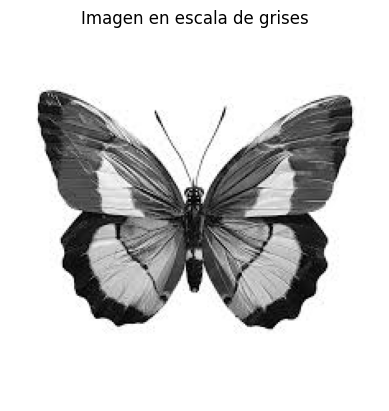

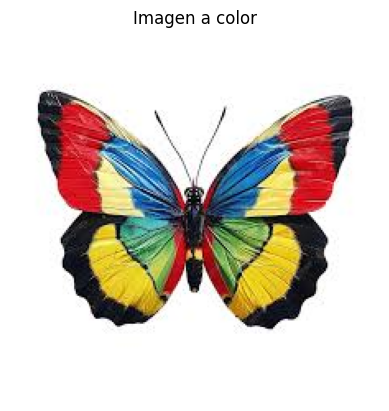

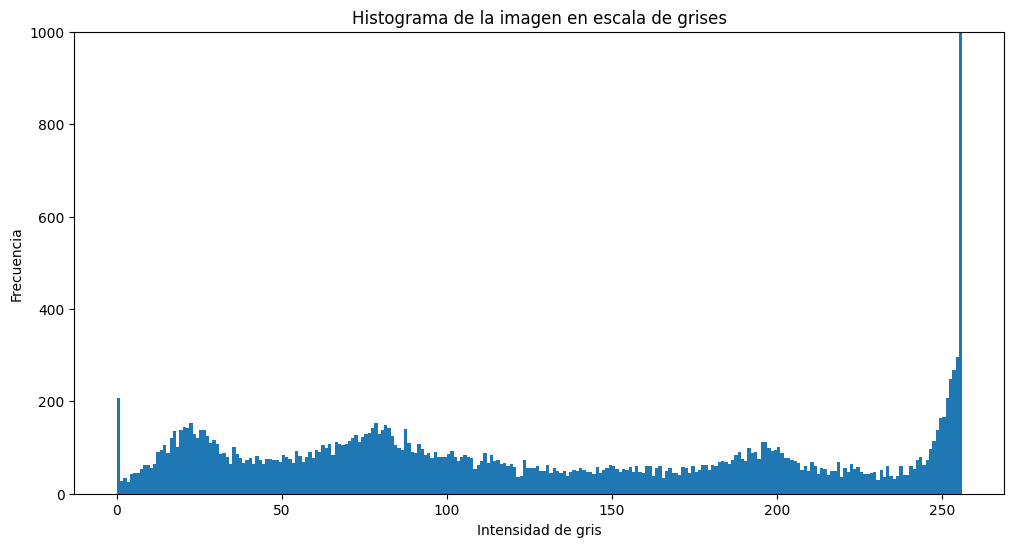

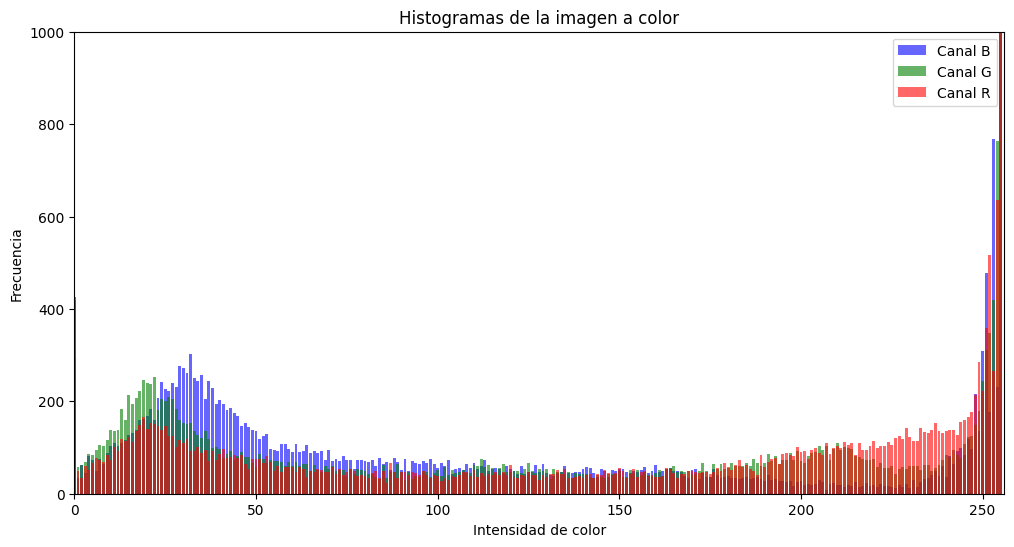

In [8]:
img_gris = cv2.imread('mariposa.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('mariposa.jpg')


show_image(img_gris, 'Imagen en escala de grises')
show_image(img_color, 'Imagen a color')

plt.figure(figsize=(12, 6))
plt.hist(img_gris.ravel(), bins=256, range=[0,256])
plt.ylim([0,1000])
plt.title('Histograma de la imagen en escala de grises')
plt.xlabel('Intensidad de gris')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
for i, color in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([img_color], [i], None, [256], [0, 256])
    #plt.plot(hist, color=color)
    plt.bar(range(256), hist.ravel(), color=color, alpha=0.6, label=f'Canal {color.upper()}')
    plt.xlim([0, 256])
    plt.ylim([0,1000])
plt.title('Histogramas de la imagen a color')
plt.xlabel('Intensidad de color')
plt.ylabel('Frecuencia')
plt.legend(['Canal B', 'Canal G', 'Canal R'])
plt.show()



2. Convertir una imagen de color a escala de grises y HSV. Extraer cada canal de color por separado y
mostrarlo con histograma.

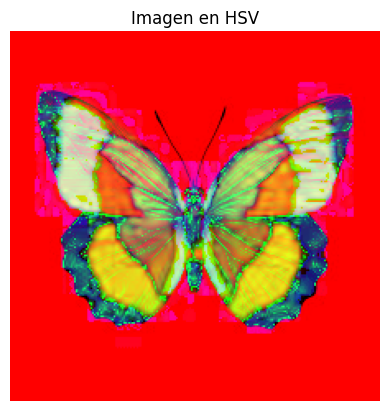

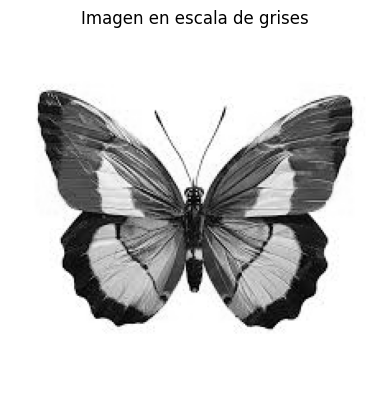

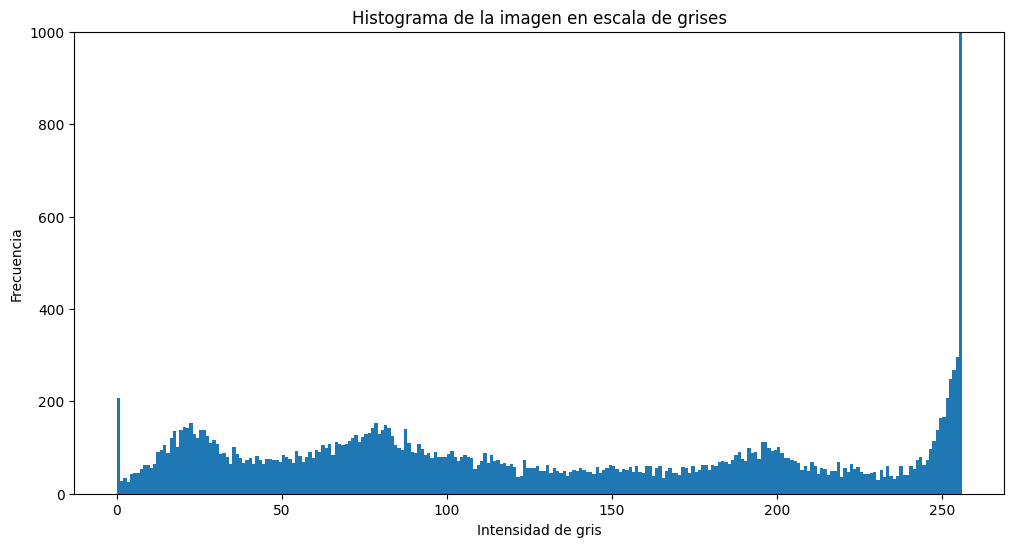

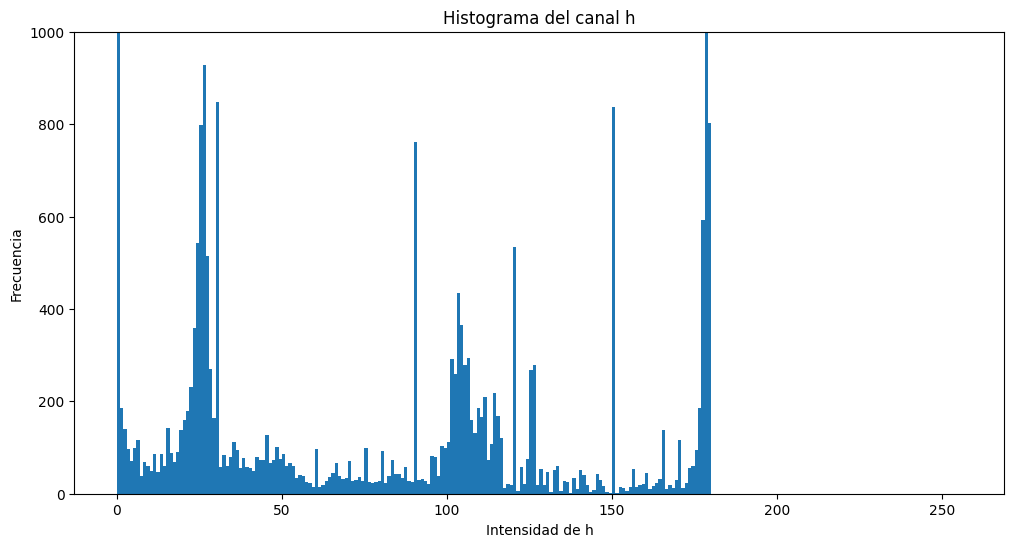

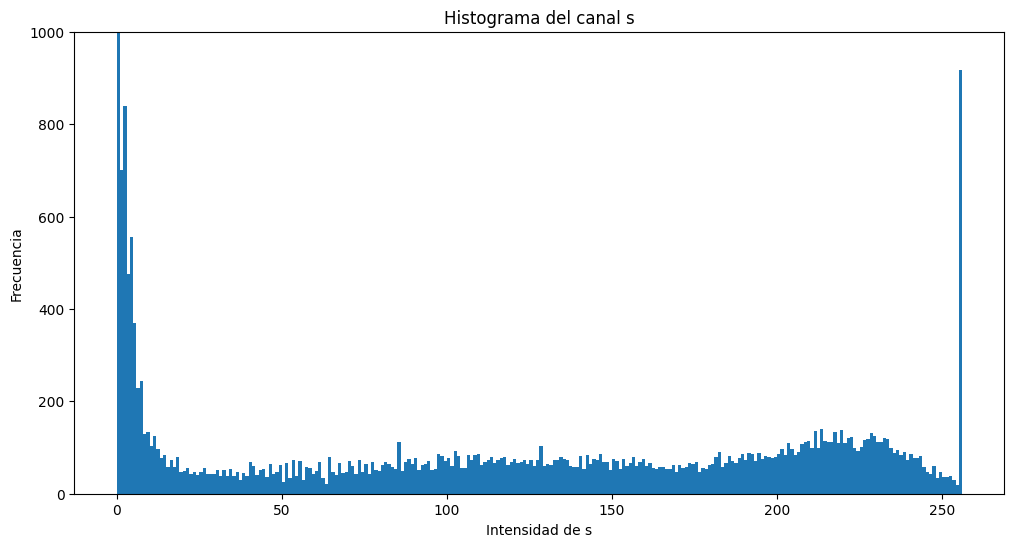

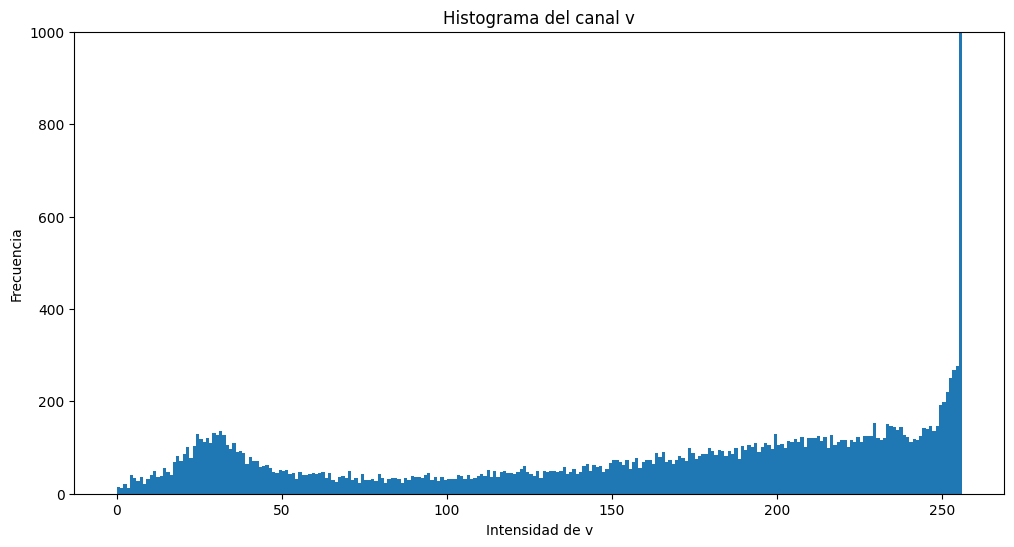

In [12]:
img = cv2.imread('mariposa.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(img_hsv, 'Imagen en HSV')
show_image(img_gray, 'Imagen en escala de grises')

plt.figure(figsize=(12, 6))
plt.hist(img_gris.ravel(), bins=256, range=[0,256])
plt.ylim([0,1000])
plt.title('Histograma de la imagen en escala de grises')
plt.xlabel('Intensidad de gris')
plt.ylabel('Frecuencia')
plt.show()

h, s, v = cv2.split(img_hsv)
for i, canal in enumerate(['h', 's', 'v']):
    plt.figure(figsize=(12, 6))
    plt.hist(cv2.split(img_hsv)[i].ravel(), bins=256, range=[0,256])
    plt.ylim([0,1000])
    plt.title(f'Histograma del canal {canal}')
    plt.xlabel(f'Intensidad de {canal}')
    plt.ylabel('Frecuencia')
    plt.show()
    


3. Cargar una imagen en escala de grises y a color. Posteriormente, modificar un conjunto de pıxeles en
una region especıfica (por ejemplo, convertir una zona a negro). Calcular el negativo de una imagen
invirtiendo los valores de pıxeles.


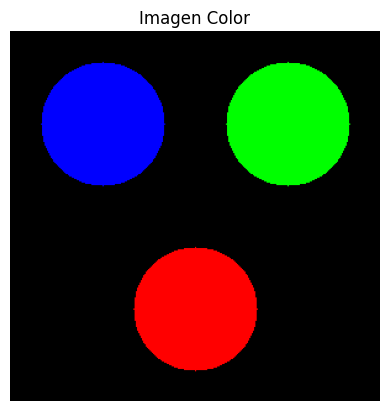

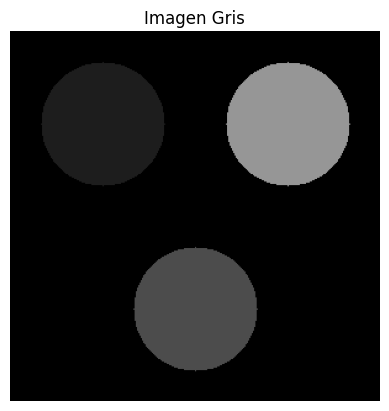

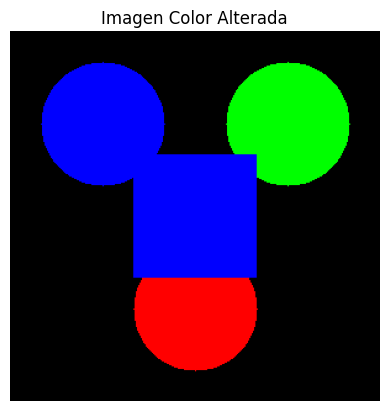

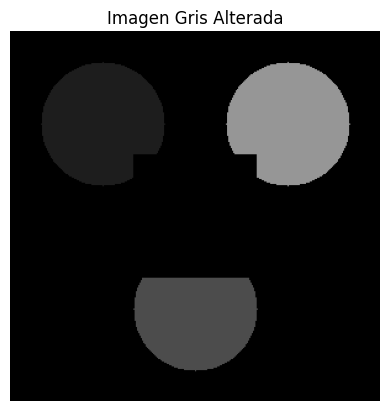

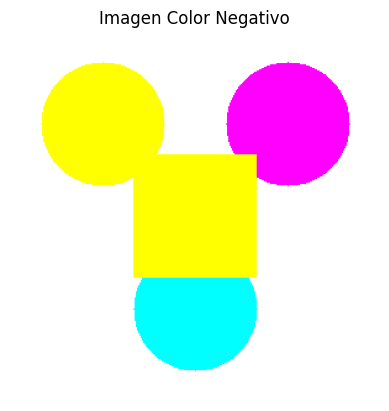

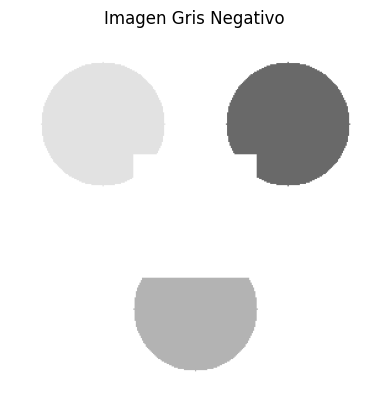

In [4]:
img = cv2.imread('img_color3.png')
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(img, 'Imagen Color')
show_image(img_gris, 'Imagen Gris')

img[100:200,100:200] = [255,0,0] # cuadrado azul
img_gris[100:200,100:200] = [0] # Cuadrado negro

show_image(img, 'Imagen Color Alterada')
show_image(img_gris, 'Imagen Gris Alterada')

img_negativo = cv2.bitwise_not(img)
img_gris_negativo = cv2.bitwise_not(img_gris)

show_image(img_negativo, 'Imagen Color Negativo')
show_image(img_gris_negativo, 'Imagen Gris Negativo')




4. Implementar una transformacion lineal de la forma I’=α I+β donde α es el factor de contraste y β
es el ajuste de brillo.

In [5]:
def ajuste_brillo_contraste(img, alfa, beta):
    img_float = img.astype(np.float32) # transformamos a float para poder tener una representacion transitoria de las operaciones
    img_ajustada = alfa * img + beta
    return np.clip(img_ajustada, 0, 255).astype(np.uint8) # clip limita los valores dentro del intervalo 0-255

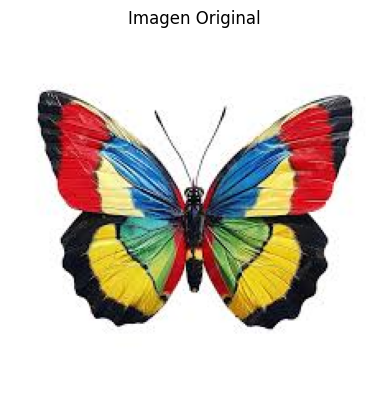

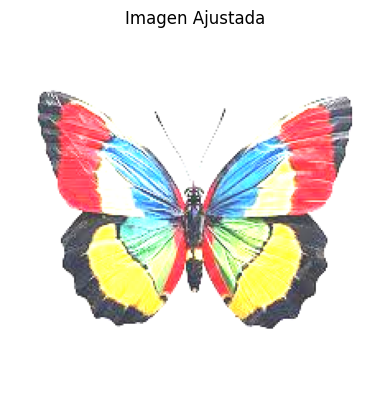

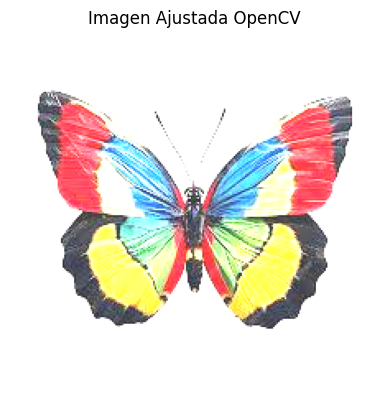

In [8]:
img = cv2.imread('mariposa.jpg')

show_image(img, 'Imagen Original')

#Version casera
img_ajustada = ajuste_brillo_contraste(img, 1.5, 50) # Aumento de contraste y brillo
show_image(img_ajustada, 'Imagen Ajustada')

#Version OpenCV
img_ajustada_opencv = cv2.convertScaleAbs(img, alpha=1.5, beta=50)
show_image(img_ajustada_opencv, 'Imagen Ajustada OpenCV')


5. Cargar dos imagenes diferentes (por ejemplo, fotos tomadas en diferentes condiciones de iluminacion).
Calcular sus histogramas y compararlos usando diferentes metricas (correlacion, chi-cuadrado, interseccion).

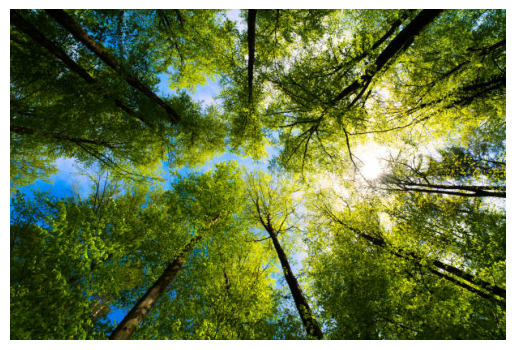

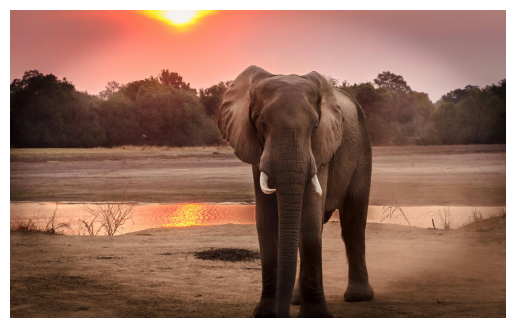

Correlación: 0.03012336411038037
Chi-cuadrado: 92.41770649437869
Intersección: 0.4639007923576912


In [31]:
img1 = cv2.imread('bosque.jpg')
img2 = cv2.imread('elefante.jpg')

# Calcular histogramas normalizados
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist1 = cv2.normalize(hist1, hist1).flatten()
hist2 = cv2.normalize(hist2, hist2).flatten()

# Comparar con distintas métricas
correl = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
chi = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

hist1 = cv2.normalize(hist1, hist1, norm_type=cv2.NORM_L1).flatten()
hist2 = cv2.normalize(hist2, hist2, norm_type=cv2.NORM_L1).flatten()
inter = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)

show_image(img1)
show_image(img2)
print(f"Correlación: {correl}")
print(f"Chi-cuadrado: {chi}")
print(f"Intersección: {inter}")

6. Explicar qu´e diferencias se pueden observar en los histogramas.


De acuerdo con las métricas evaluadas se observa:  
**Correlación (-1 a 1):** el valor es muy cercano a cero idicando que casi no hay correlación, los histogramas son bastante diferentes.  
**Chi-cuadrado (0 a inf.):** el valor es bastante grande, también indicando que los histogramas son distintos.  
**Intersección (0 a 1):** al igual que las métricas anteriores, indica que no hay mucha similitud entre los histogramas.


7. (*) Transformar la distribuci´on de intensidades de una imagen para que se parezca a la de otra. Implementar el ajuste de histograma usando OpenCV o skimage.exposure.match histograms(). Comparar
los histogramas antes y despu´es del ajuste.


In [28]:
def show_colour_histogram(img, title):
    plt.figure(figsize=(12, 6))
    for i, color in enumerate(['b', 'g', 'r']):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        # Normalizar el histograma
        hist = cv2.normalize(hist, hist).flatten()
        #plt.plot(hist, color=color)
        plt.bar(range(256), hist.ravel(), color=color, alpha=0.6, label=f'Canal {color.upper()}')
        plt.xlim([0, 256])
        plt.ylim([0,1])
    plt.title(title)
    plt.xlabel('Intensidad de color')
    plt.ylabel('Frecuencia')
    plt.legend(['Canal B', 'Canal G', 'Canal R'])
    plt.show()

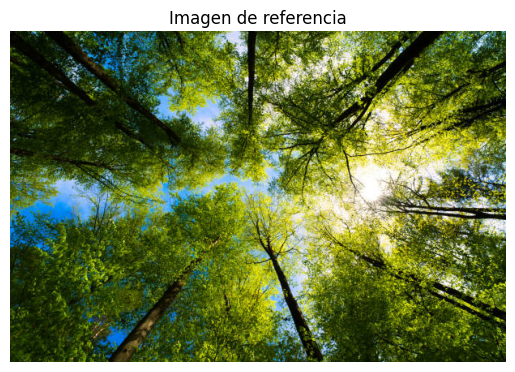

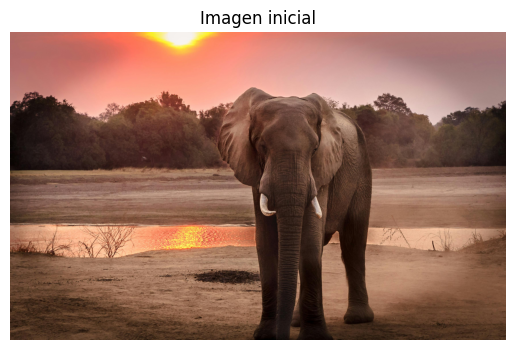

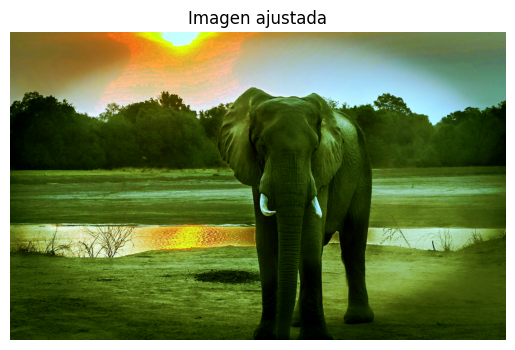

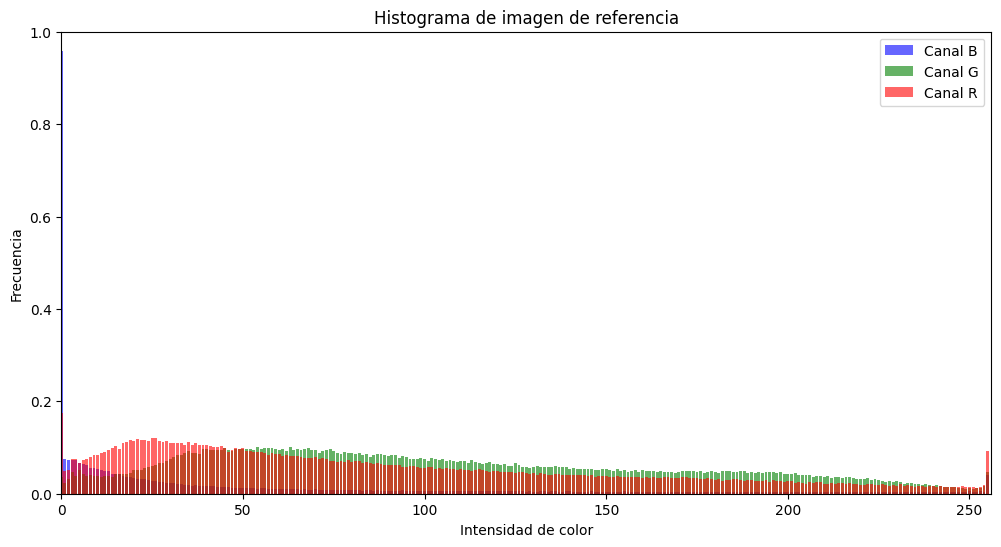

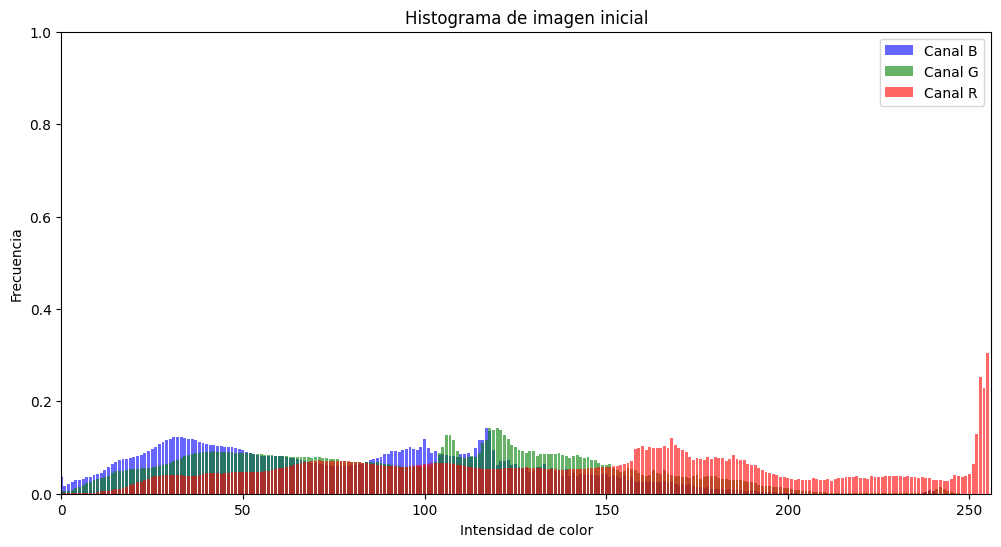

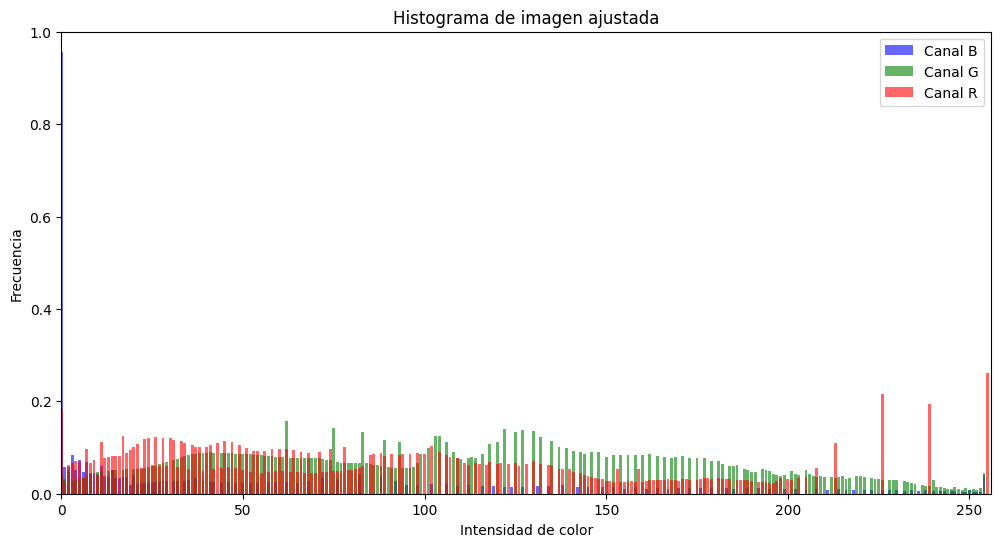

In [30]:
def match_hist_color(source, reference):
    matched = source.copy()
    for i in range(3):  # B, G, R
        matched[:,:,i] = match_histograms(source[:,:,i], reference[:,:,i])
    return matched

source = cv2.imread('elefante.jpg')
reference = cv2.imread('bosque.jpg')
matched_color = match_hist_color(source, reference)

show_image(reference, "Imagen de referencia")
show_image(source, "Imagen inicial")
show_image(matched_color,"Imagen ajustada")

pre_hist = cv2.calcHist([source], [0], None, [256], [0, 256])
post_hist = cv2.calcHist([matched_color], [0], None, [256], [0, 256])

show_colour_histogram(reference, "Histograma de imagen de referencia")
show_colour_histogram(source,"Histograma de imagen inicial")
show_colour_histogram(matched_color, "Histograma de imagen ajustada")


8. (*) Aplicar ecualizaci´on de histograma a una imagen en escala de grises. Comparar la imagen original
con la ecualizada.

9. (*) Implementar una umbralizaci´on manual eligiendo un valor de umbral. Usar el m´etodo de Otsu
para calcular un umbral ´optimo autom´aticamente.

10. Aplicar ecualizaci´on de histograma adaptativa (CLAHE) y analizar su efecto en im´agenes con mucho
contraste.

11. (*) Implementar la transformaci´on gamma I’=I
y
, permitiendo ajustar el valor de y din´amicamente.
Aplicar diferentes valores de y en distintas regiones de la imagen (por ejemplo, usando una m´ascara
o adaptando y en funci´on del brillo local). Visualizar el efecto de la correcci´on gamma en la imagen
y en su histograma.